In [7]:
import pandas as pd
import statsmodels.api as sm
from itertools import combinations
import matplotlib.pyplot as plt

In [ ]:
# Load the housing dataset
housing = pd.read_csv('housing.csv')

# Drop categorical data
housing.drop(['ocean_proximity'], axis=1, inplace=True)

# Handle missing values by removing rows
housing.dropna(inplace=True)

In [9]:
# Define the target and features
X = housing.drop(columns=['median_house_value'])
y = housing['median_house_value']

In [10]:
# Correlation matrix
print("\n--- Correlation Matrix ---")
print(X.corr())


--- Correlation Matrix ---
                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_income       -0.015550 -0.079626           -0.118278     0.197882   

                    total_bedrooms  population  households  median_income  
longitude                 0.069608    0.100270    0.056513      -0.015550  
latitude                 -0.066983   -0.108997   -0.071774      -0.079626  
housing_median_age       -0.320451   -0.295787   -0.302768 

In [11]:
# Forward Selection Function with tqdm for progress tracking
from tqdm import tqdm

def forward_selection(data, target, threshold_in=0.01):
    initial_features = []
    remaining_features = list(data.columns)
    selected_features = []

    with tqdm(total=len(remaining_features)) as pbar:
        while remaining_features:
            scores_with_candidates = []
            for candidate in remaining_features:
                model = sm.OLS(target, sm.add_constant(data[initial_features + [candidate]])).fit()
                p_value = model.pvalues[candidate]
                scores_with_candidates.append((p_value, candidate))
            
            scores_with_candidates.sort()
            best_pval, best_candidate = scores_with_candidates[0]
            if best_pval < threshold_in:
                initial_features.append(best_candidate)
                remaining_features.remove(best_candidate)
                selected_features.append(best_candidate)
                pbar.update(1)
            else:
                break
    return selected_features

In [12]:
# Run forward selection
selected = forward_selection(X, y)
print("\nSelected Features using Forward Selection:", selected)

100%|██████████| 8/8 [00:00<00:00, 14.35it/s]


Selected Features using Forward Selection: ['median_income', 'housing_median_age', 'total_bedrooms', 'population', 'total_rooms', 'latitude', 'longitude', 'households']


In [13]:
# Fit final model
final_model = sm.OLS(y, sm.add_constant(X[selected])).fit()
print("\n--- Final Model Summary ---")
print(final_model.summary())


--- Final Model Summary ---
                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     4478.
Date:                Sat, 10 May 2025   Prob (F-statistic):               0.00
Time:                        19:25:05   Log-Likelihood:            -2.5682e+05
No. Observations:               20433   AIC:                         5.137e+05
Df Residuals:                   20424   BIC:                         5.137e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const  

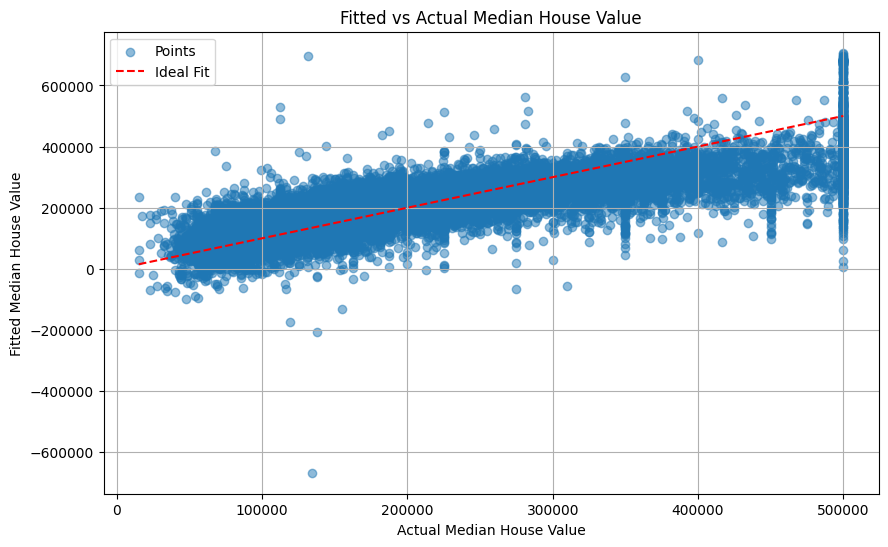

In [15]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y, final_model.fittedvalues, alpha=0.5, label='Points')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Median House Value')
plt.ylabel('Fitted Median House Value')
plt.title('Fitted vs Actual Median House Value')
plt.legend()
plt.grid(True)
plt.show()